In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets
!pip list
# IMPORTS
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
# from keras.preprocessing import image
import keras.utils as image
from google.colab import drive
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1

In [3]:
"""
This file contains all the code that has 
    successfully worked at least once. I am 
    copying it here so I don't potentially lose
    it or fuck it up somehow.

NOTE: This code works in Google Colab, not VsCode
    The reason being because tensorflow is not installed 
    in Jupyter Notbooks or VsCode.
"""

# Models for Image Generation
# https://www.tensorflow.org/hub/tutorials/bigbigan_with_tf_hub
# https://www.tensorflow.org/hub/tutorials/s3gan_generation_with_tf_hub
# https://www.tensorflow.org/tutorials/generative/dcgan
# 



"""  This section's code labels all the images in a folder  """

# THIS STUFF IS FOR GOOGLE COLAB ONLY
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

# This is the path for my computer, where the Vincent photos is located in my drive
# If you want to run this, you need to change it to your path 
# (to where it reaches the /Vincent_van_Gogh folder with all the images)
# You may need to change some other paths below too
%cd /content/drive/MyDrive/ADS/ADS Project

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1bVMR8F2JpYlyv5st_OcRzA-iCQmxeRNF/ADS Project


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model


102967424/102967424 [==============================] - 6s 0us/step
Vincent_van_Gogh_105.jpg


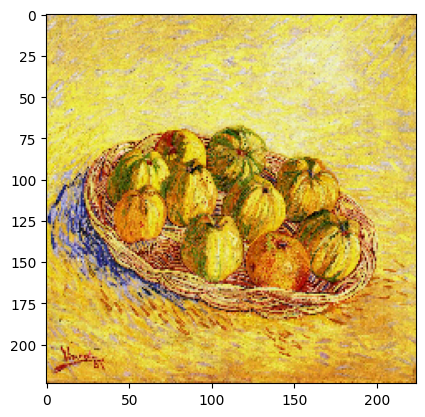

1/1 [==============================] - 8s 8s/step
2.6616808e-06
Vincent_van_Gogh_100.jpg


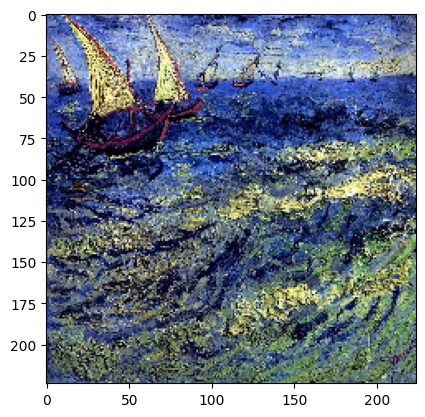

1/1 [==============================] - 0s 29ms/step
9.434629e-06
Vincent_van_Gogh_109.jpg


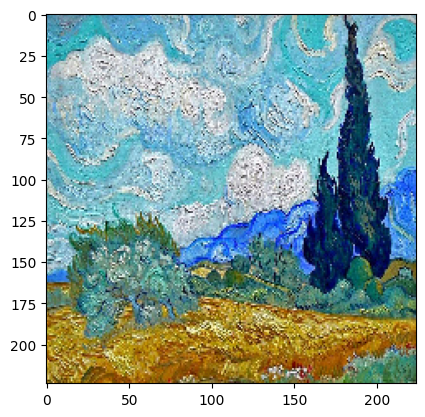

1/1 [==============================] - 0s 31ms/step
0.0013987224
Vincent_van_Gogh_102.jpg


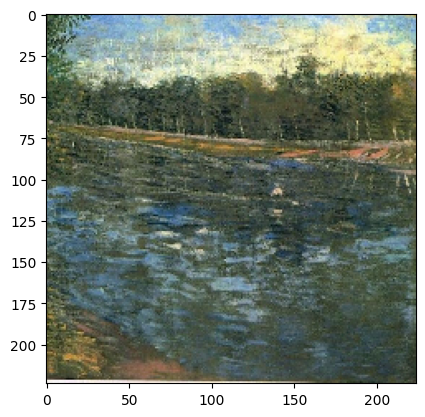

1/1 [==============================] - 0s 27ms/step
3.7991504e-05
Vincent_van_Gogh_111.jpg


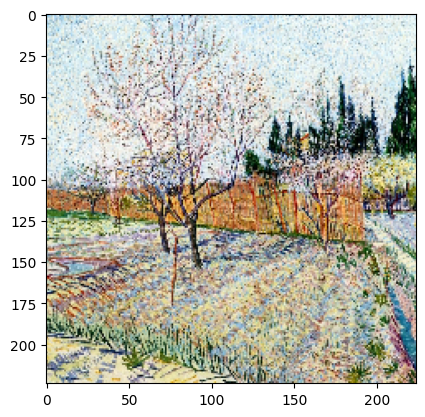

1/1 [==============================] - 0s 27ms/step
1.5019487e-05
Vincent_van_Gogh_103.jpg


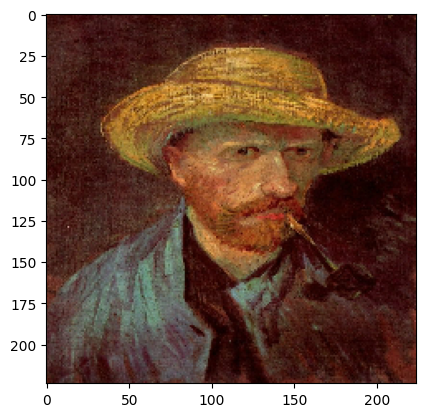

1/1 [==============================] - 0s 26ms/step
1.6793685e-05
Vincent_van_Gogh_115.jpg


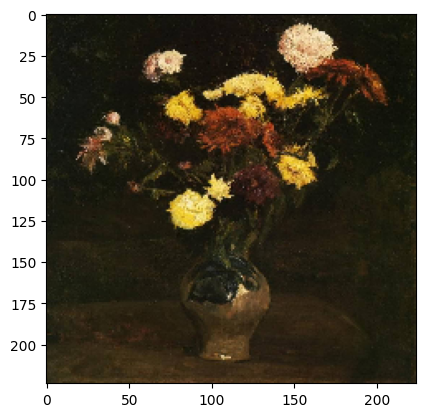

1/1 [==============================] - 0s 27ms/step
0.0004764061
Vincent_van_Gogh_11.jpg


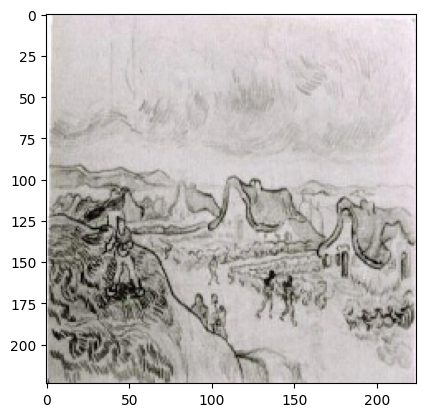

1/1 [==============================] - 0s 29ms/step
2.4029614e-06
Vincent_van_Gogh_119.jpg


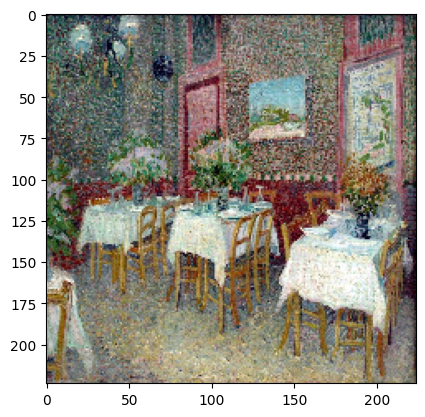

1/1 [==============================] - 0s 27ms/step
1.4133593e-07
Vincent_van_Gogh_101.jpg


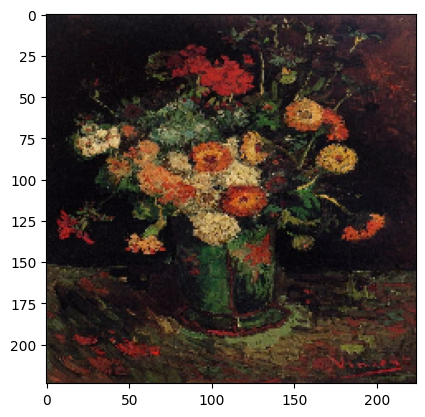

1/1 [==============================] - 0s 30ms/step
0.0028204967
Vincent_van_Gogh_118.jpg


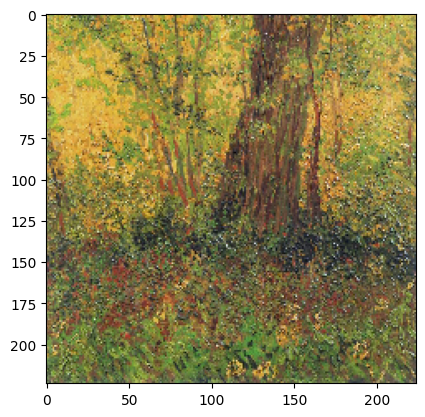

1/1 [==============================] - 0s 26ms/step
6.771711e-06
Vincent_van_Gogh_10.jpg


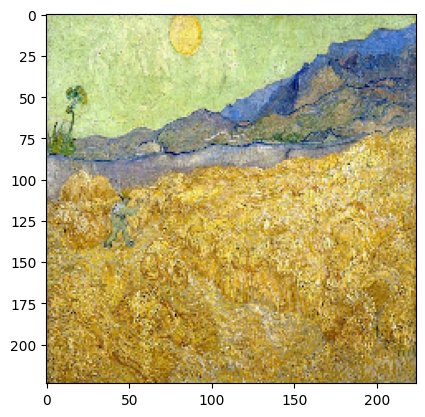

1/1 [==============================] - 0s 25ms/step
0.0014991133
Vincent_van_Gogh_112.jpg


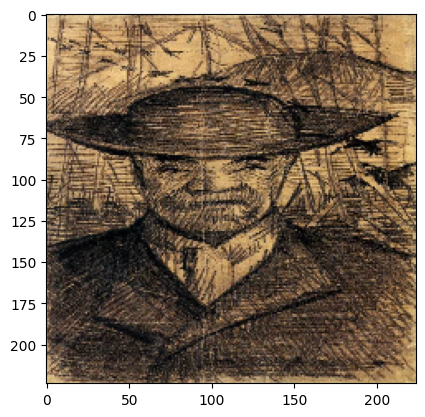

1/1 [==============================] - 0s 34ms/step
1.5838406e-05
Vincent_van_Gogh_114.jpg


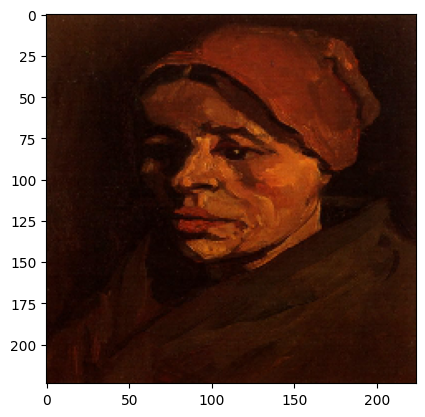

1/1 [==============================] - 0s 40ms/step
2.5007366e-05
Vincent_van_Gogh_110.jpg


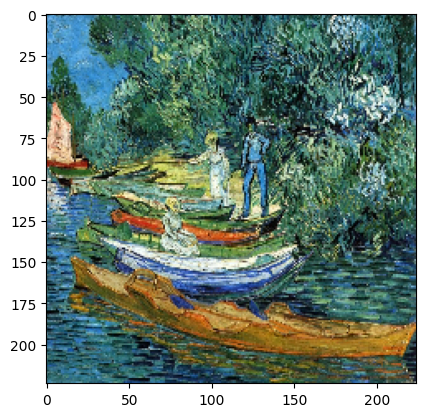

1/1 [==============================] - 0s 29ms/step
0.00018055573
Vincent_van_Gogh_12.jpg


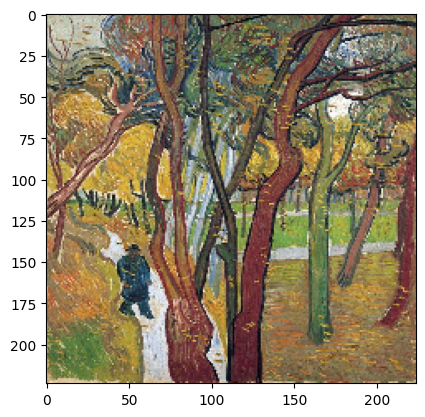

1/1 [==============================] - 0s 30ms/step
5.8196267e-05
Vincent_van_Gogh_107.jpg


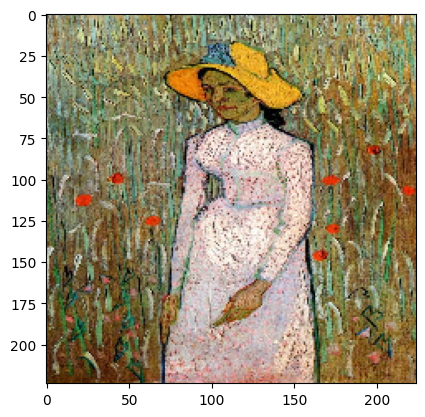

1/1 [==============================] - 0s 25ms/step
1.039684e-05
Vincent_van_Gogh_116.jpg


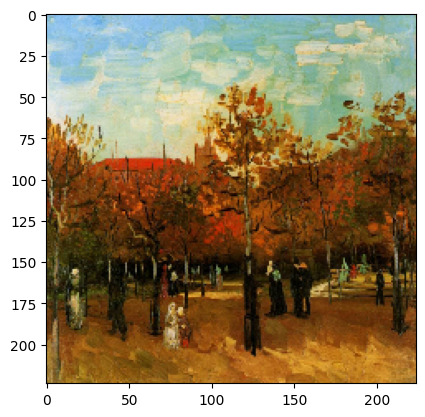

1/1 [==============================] - 0s 25ms/step
8.592715e-05
Vincent_van_Gogh_104.jpg


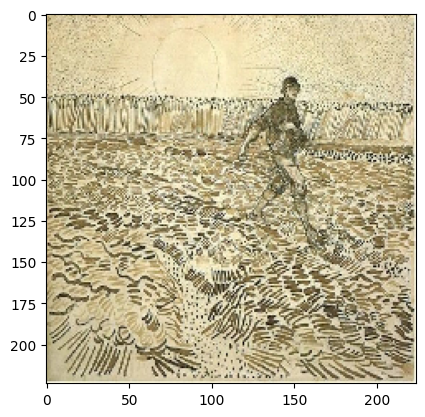

1/1 [==============================] - 0s 28ms/step
9.593348e-07
Vincent_van_Gogh_1.jpg


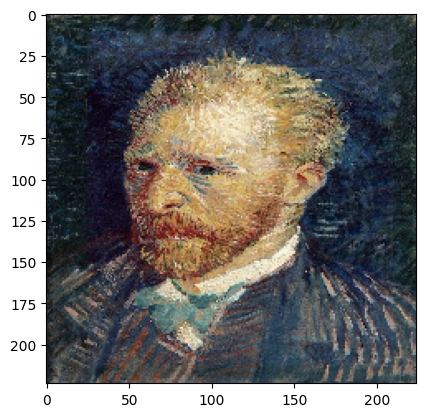

1/1 [==============================] - 0s 26ms/step
9.233041e-05
Vincent_van_Gogh_113.jpg


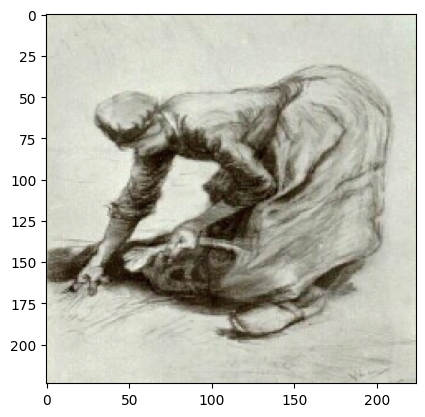

1/1 [==============================] - 0s 26ms/step
3.494999e-06
Vincent_van_Gogh_106.jpg


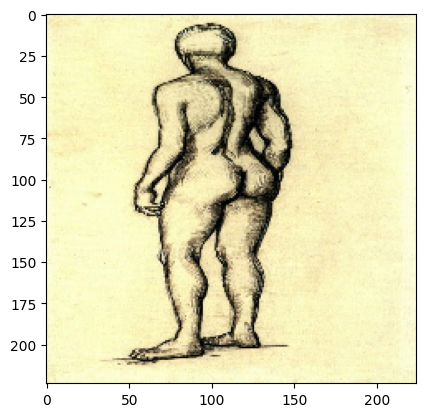

1/1 [==============================] - 0s 26ms/step
3.2744096e-11
Vincent_van_Gogh_117.jpg


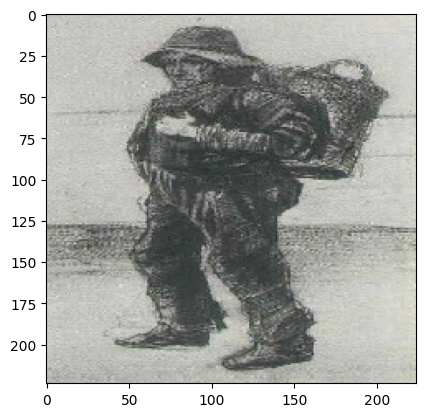

1/1 [==============================] - 0s 24ms/step
3.4441405e-07
Vincent_van_Gogh_108.jpg


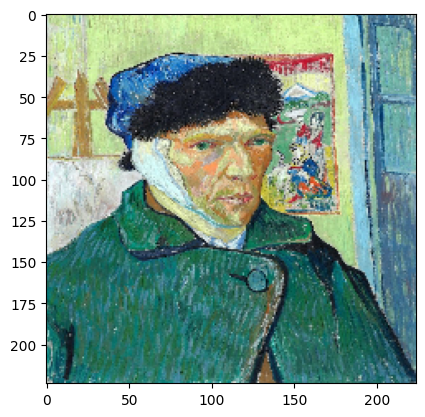

1/1 [==============================] - ETA: 0s

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import time
#time.sleep(600) # increase timeout to 600 seconds (10 minutes)
batch_size = 32 # Reduce batch size to 32


def preprocess_image(image_path, label):
    image = tf.image.decode_jpeg(image_path, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)
    return image, label


final_data = []
model = ResNet50(weights='imagenet')

# Loops through every file (picture) in folder
directory = os.fsencode('/content/drive/MyDrive/ADS/ADS Project/Data')


for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)

    img_path = '/content/drive/MyDrive/ADS/ADS Project/Data/' + filename
    img = image.load_img(img_path, target_size=(224, 224))

    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(preds[0][1])
    final_data.append((x, preds[0:9]))

    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)

dataset = tf.data.Dataset.from_generator(lambda: final_data,
                                         output_types=(tf.float32, tf.float32),
                                         output_shapes=((1, 224, 224, 3), (1, 1000)))

dataset = dataset.shuffle(buffer_size=len(final_data)).batch(batch_size=32)



In [ ]:
dataset = tf.data.Dataset.from_generator(lambda: final_data,
                                         output_types=(tf.float32, tf.float32),
                                         output_shapes=((1, 224, 224, 3), (1, 1000)))
dataset = dataset.shuffle(buffer_size=len(final_data))

tf.data.experimental.save(dataset, 'my_dataset')

dataset = tf.data.experimental.load('my_dataset', element_spec=(tf.TensorSpec(shape=(1, 224, 224, 3), dtype=tf.float32), tf.TensorSpec(shape=(1, 1000), dtype=tf.float32)))



In [ ]:
import random

# set the seed for reproducibility
random.seed(42)

# assume your data is stored in a list called `data`
num_samples = len(dataset)
train_ratio = 0.8
test_ratio = 0.2

# split the data into train and test sets
train_data = dataset.take(int(num_samples * train_ratio))
test_data = dataset.skip(int(num_samples * train_ratio))

# create a validation set from the training data
val_ratio = 0.2
num_train_samples = len(train_data)
train_data = train_data.shuffle(buffer_size=num_train_samples, seed=42)
val_data = train_data.take(int(num_train_samples * val_ratio))
train_data = train_data.skip(int(num_train_samples * val_ratio))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2D, UpSampling2D, LeakyReLU

def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 1x28x28x2
    # Beginnings of a generated image
    model.add(Dense(1*28*28*2, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((28,28,2)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(64, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(64, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model



In [ ]:
generator = build_generator()
generator.summary()
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

In [ ]:
def build_discriminator(): 
    model = Sequential()
    
    # Convolutional block 1
    model.add(Conv2D(64, 4, strides=2, padding='same', input_shape=(128,128,1)))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Flatten and output
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    return model


In [ ]:
discriminator = build_discriminator()
discriminator.summary()


In [ ]:
img=generator.predict(np.random.randn(4,128,1))
img.shape

In [ ]:


img=img[0]
img = img.reshape((img.shape[0], img.shape[1], 1))
img = tf.image.resize(img, (28, 28))
img = img.numpy()
img = np.squeeze(img, axis=-1)


In [ ]:
img.shape

In [ ]:
discriminator.predict(np.expand_dims(img,0))

In [ ]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 
        
    def call(self, x):
        # Call generator with input noise
        return self.generator(x)
        
    def train_step(self, data):
        batch = data[0] # Unpack the tuple to get the image data array
        # Get the data
        real_images = tf.transpose(batch[:, :, :, :-1], perm=[0, 2, 1, 3])
        fake_images = self(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as tape:
            real_logits = self.discriminator(real_images, training=True)
            fake_logits = self.discriminator(fake_images, training=True)
            d_loss = discriminator_loss(real_logits, fake_logits)

        grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(grads, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as tape:
            fake_images = self(tf.random.normal((128, 128, 1)), training=True)
            fake_logits = self.discriminator(fake_images, training=False)
            g_loss = generator_loss(fake_logits)

        grads = tape.gradient(g_loss, self.generator.trainable_variables)


In [ ]:
fashgan = FashionGAN(generator, discriminator)

In [ ]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Generating images after epoch %d" % epoch)
        fake_images = self.model.generator(tf.random.normal((128, 128, 1)), training=False)
        fake_images = (fake_images + 1.0) / 2.0
        save_images(fake_images.numpy(), "generated_image_%d.png" % epoch)

In [ ]:
hist = fashgan.fit(train_data, epochs=20, callbacks=[ModelMonitor()])